<a href="https://colab.research.google.com/github/KSharif/Deep_learning/blob/main/Copy_of_Heart%20with%20cnnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

# Step 2: Fetch and prepare the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X_clean = df.drop(columns=['num'])  # Assuming 'num' is the target column
y_clean = df['num']

# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Define and Tune Models

# Random Forest Tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_tuned_model = RandomizedSearchCV(rf_model, rf_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
rf_tuned_model.fit(X_train, y_train)

# Evaluate Random Forest
rf_best_model = rf_tuned_model.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))

# SVM Tuning
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_tuned_model = RandomizedSearchCV(svm_model, svm_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
svm_tuned_model.fit(X_train, y_train)

# Evaluate SVM
svm_best_model = svm_tuned_model.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)
print("SVM")
print(classification_report(y_test, y_pred_svm))

# XGBoost Tuning
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_tuned_model = RandomizedSearchCV(xgb_model, xgb_params, n_iter=30, cv=5, scoring='accuracy', random_state=42)
xgb_tuned_model.fit(X_train, y_train)

# Evaluate XGBoost
xgb_best_model = xgb_tuned_model.best_estimator_
y_pred_xgb = xgb_best_model.predict(X_test)
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))

# Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.92      0.89      0.91        27
           2       0.96      1.00      0.98        26
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        32

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130

SVM
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.96      0.93      0.94        27
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        32

    accuracy                           0.98       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.98      0.98      0.98       130

XGBo

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.92      0.89      0.91        27
           2       0.96      1.00      0.98        26
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        32

    accuracy                           0.96       130
   macro avg       0.96      0.96      0.96       130
weighted avg       0.96      0.96      0.96       130



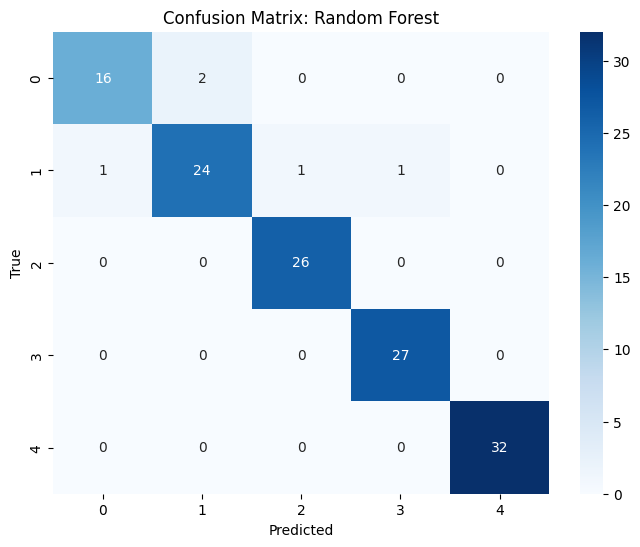

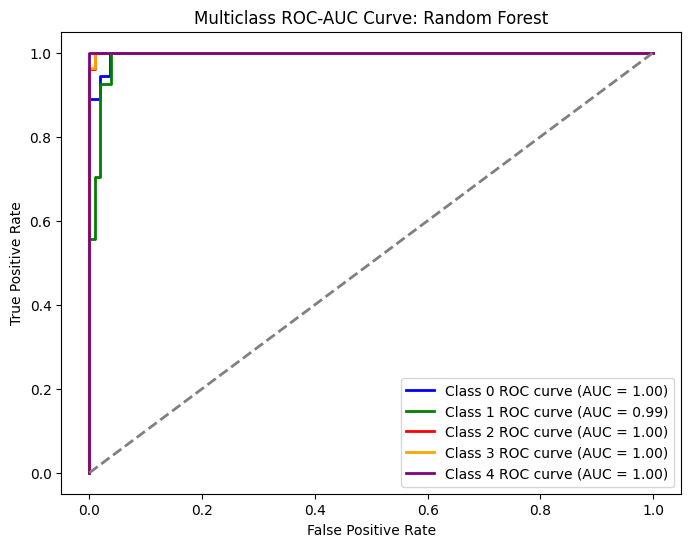

SVM
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.96      0.93      0.94        27
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        32

    accuracy                           0.98       130
   macro avg       0.97      0.97      0.97       130
weighted avg       0.98      0.98      0.98       130



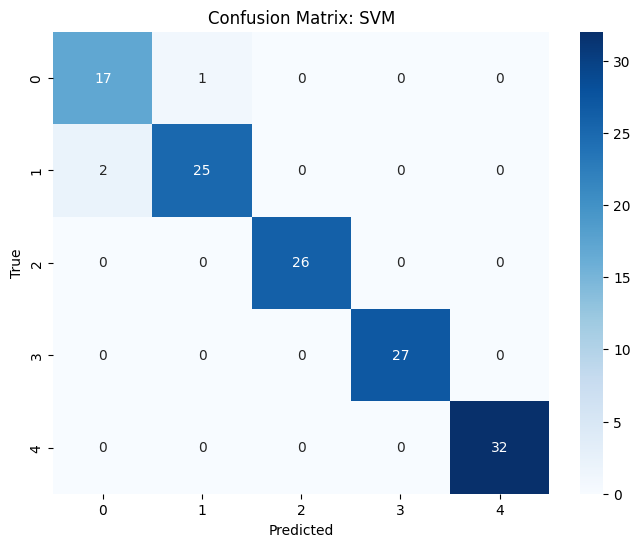

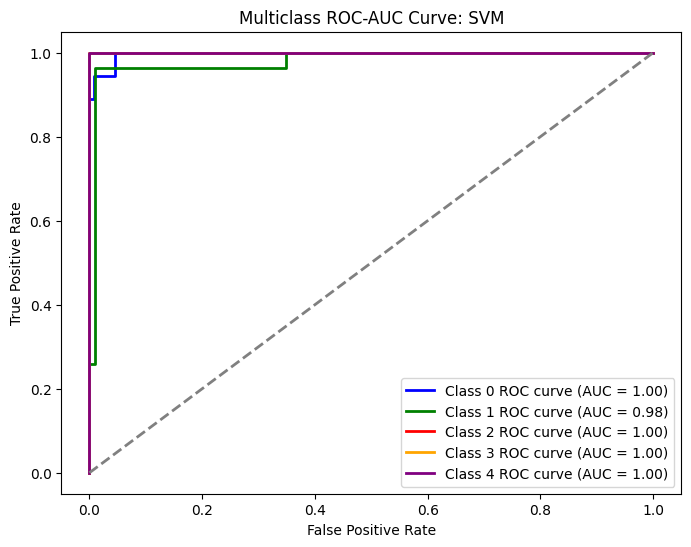

XGBoost
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.92      0.81      0.86        27
           2       0.96      1.00      0.98        26
           3       0.93      0.96      0.95        27
           4       0.94      1.00      0.97        32

    accuracy                           0.94       130
   macro avg       0.94      0.93      0.93       130
weighted avg       0.94      0.94      0.94       130



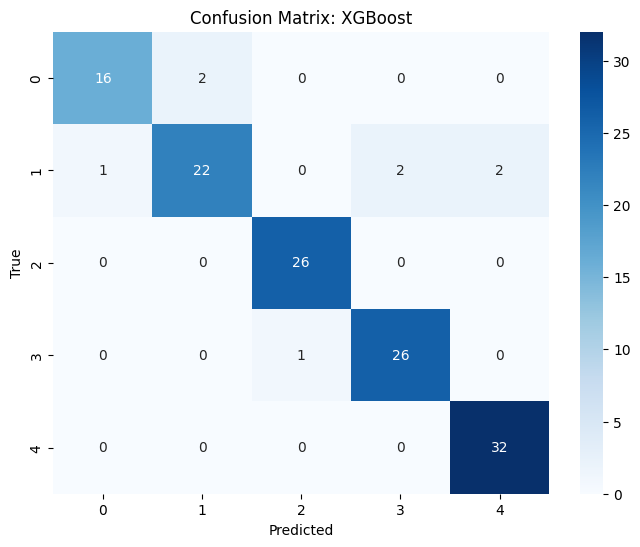

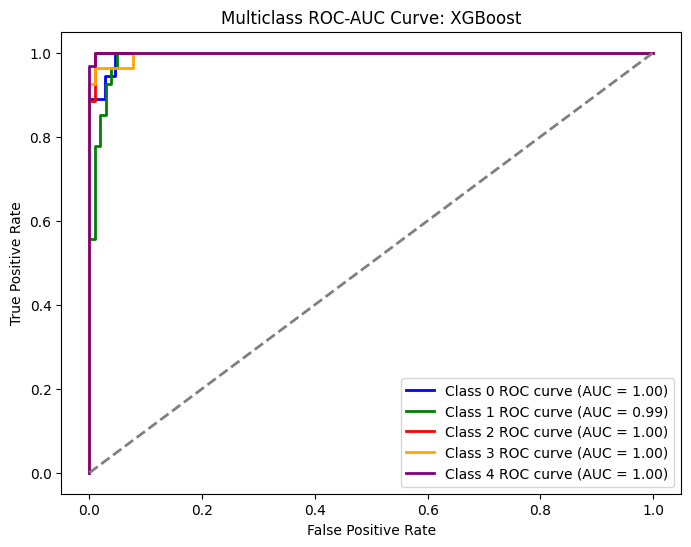

No evaluation results found for XGBoost.
Logistic Regression
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.85      0.85      0.85        27
           2       0.96      0.88      0.92        26
           3       0.93      0.96      0.95        27
           4       0.94      1.00      0.97        32

    accuracy                           0.92       130
   macro avg       0.92      0.92      0.92       130
weighted avg       0.92      0.92      0.92       130



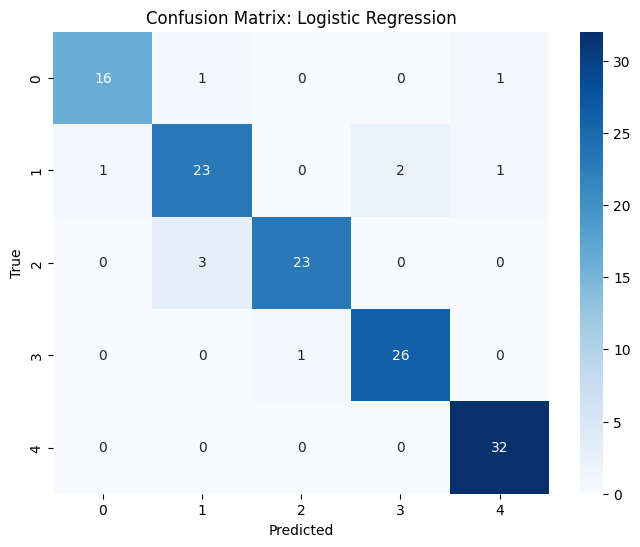

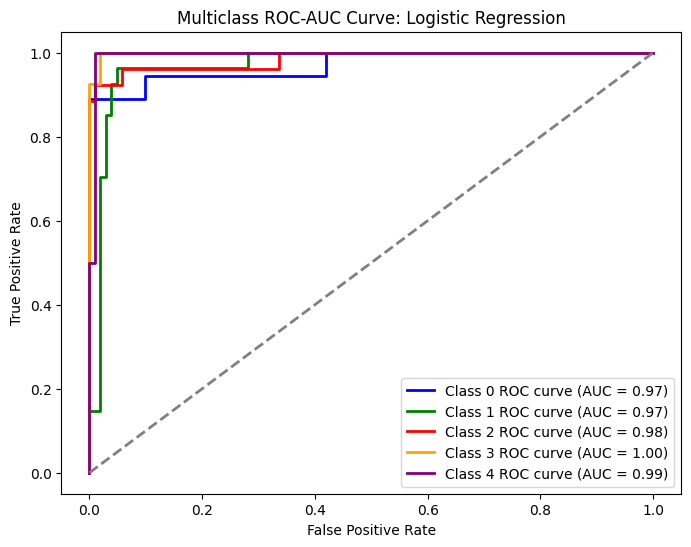

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import pandas as pd

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC-AUC curve for multiclass classification
def plot_roc_auc_multiclass(y_true, y_pred_prob, model_name):
    n_classes = len(np.unique(y_true))
    fpr = {}
    tpr = {}
    roc_auc = {}

    # Binarize the output for ROC computation
    y_true_binarized = pd.get_dummies(y_true).values

    # Compute ROC curve and ROC area for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotting the ROC-AUC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} ROC curve (AUC = {roc_auc[i]:.2f})')
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.title(f'Multiclass ROC-AUC Curve: {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot loss curve, applicable mainly for XGBoost and other models with evals_result_
def plot_loss_curve(model, model_name):
    if hasattr(model, 'evals_result_'):
        evals_result = model.evals_result()
        train_loss = evals_result['validation_0']['logloss']
        val_loss = evals_result['validation_1']['logloss']
        epochs = range(len(train_loss))

        # Plotting the loss curves for training and validation
        plt.figure(figsize=(8, 6))
        plt.plot(epochs, train_loss, label='Training Loss', color='blue')
        plt.plot(epochs, val_loss, label='Validation Loss', color='red')
        plt.title(f'Loss Curve: {model_name}')
        plt.xlabel('Epochs')
        plt.ylabel('Log Loss')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No evaluation results found for {model_name}.")

# Random Forest Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
y_pred_rf_prob = rf_best_model.predict_proba(X_test)
plot_roc_auc_multiclass(y_test, y_pred_rf_prob, 'Random Forest')

# SVM Evaluation
print("SVM")
print(classification_report(y_test, y_pred_svm))
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
y_pred_svm_prob = svm_best_model.decision_function(X_test)
# Convert decision function output to probabilities for ROC-AUC calculation
y_pred_svm_prob = np.array([np.exp(x) / sum(np.exp(x)) for x in y_pred_svm_prob])
plot_roc_auc_multiclass(y_test, y_pred_svm_prob, 'SVM')

# XGBoost Evaluation
# Ensure XGBoost is trained with eval_set to track loss
print("XGBoost")
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
y_pred_xgb_prob = xgb_best_model.predict_proba(X_test)
plot_roc_auc_multiclass(y_test, y_pred_xgb_prob, 'XGBoost')
plot_loss_curve(xgb_best_model, 'XGBoost')  # Plot loss curve if available

# Logistic Regression Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression')
y_pred_lr_prob = lr_model.predict_proba(X_test)
plot_roc_auc_multiclass(y_test, y_pred_lr_prob, 'Logistic Regression')


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.9 MB/s eta 0:00:00


In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

# Step 2: Fetch and prepare the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X_clean = df.drop(columns=['num'])  # Assuming 'num' is the target column
y_clean = df['num']

# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define Optuna objective functions for each model
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 4),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def optimize_svm(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.1, 100),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'class_weight': 'balanced',
        'probability': True,
        'random_state': 42
    }
    model = SVC(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

def optimize_lr(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.01, 100),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna optimization for each model
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(optimize_rf, n_trials=50)
print(f"Best parameters for Random Forest: {rf_study.best_params}")

svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(optimize_svm, n_trials=50)
print(f"Best parameters for SVM: {svm_study.best_params}")

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(optimize_xgb, n_trials=50)
print(f"Best parameters for XGBoost: {xgb_study.best_params}")

lr_study = optuna.create_study(direction='maximize')
lr_study.optimize(optimize_lr, n_trials=50)
print(f"Best parameters for Logistic Regression: {lr_study.best_params}")
print(f"Best parameters for SVM: {svm_study.best_params}")

# After finding the best parameters, you can retrain the models with these best parameters to evaluate and plot results
print(f"Best parameters for Random Forest: {rf_study.best_params}")
print(f"Best parameters for SVM: {svm_study.best_params}")
print(f"Best parameters for XGBoost: {xgb_study.best_params}")
print(f"Best parameters for Logistic Regression: {lr_study.best_params}")

[I 2024-09-20 19:26:44,410] A new study created in memory with name: no-name-5378287c-086c-4f9b-8d04-476427dcf088
[I 2024-09-20 19:26:46,243] Trial 0 finished with value: 0.9615384615384616 and parameters: {'n_estimators': 256, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': False}. Best is trial 0 with value: 0.9615384615384616.
[I 2024-09-20 19:26:48,103] Trial 1 finished with value: 0.9538461538461539 and parameters: {'n_estimators': 273, 'max_depth': 20, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.9615384615384616.
[I 2024-09-20 19:26:49,062] Trial 2 finished with value: 0.9153846153846154 and parameters: {'n_estimators': 277, 'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 0 with value: 0.9615384615384616.
[I 2024-09-20 19:26:49,945] Trial 3 finished with value: 0.9692307692307692 and parameters: {'n_estimators': 170, 'max_depth': 21, 'min_samples_spl

Best parameters for Random Forest: {'n_estimators': 124, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': False}


[I 2024-09-20 19:27:25,608] Trial 1 finished with value: 0.9615384615384616 and parameters: {'C': 89.30828233079521, 'gamma': 0.011229383090251113, 'kernel': 'rbf'}. Best is trial 1 with value: 0.9615384615384616.
<ipython-input-22-d5706287259e>:71: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 100),
<ipython-input-22-d5706287259e>:72: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
[I 2024-09-20 19:27:25,742] Trial 2 finished with value: 0.9538461538461539 and parameters: {'C': 49.64751032140352, 'gamma': 0.023596735853519433, 'kernel': 'linear'}. Best is trial 1 with value: 0.9

Best parameters for SVM: {'C': 9.46898587963973, 'gamma': 0.0065632001717694614, 'kernel': 'rbf'}


[I 2024-09-20 19:27:34,783] Trial 0 finished with value: 0.9230769230769231 and parameters: {'n_estimators': 55, 'max_depth': 9, 'learning_rate': 0.09044198836130633, 'subsample': 0.684647591656, 'colsample_bytree': 0.8908997611999432}. Best is trial 0 with value: 0.9230769230769231.
[I 2024-09-20 19:27:35,662] Trial 1 finished with value: 0.9307692307692308 and parameters: {'n_estimators': 236, 'max_depth': 7, 'learning_rate': 0.235009686570911, 'subsample': 0.7187530947671807, 'colsample_bytree': 0.6527955337119509}. Best is trial 1 with value: 0.9307692307692308.
[I 2024-09-20 19:27:43,643] Trial 2 finished with value: 0.9307692307692308 and parameters: {'n_estimators': 245, 'max_depth': 10, 'learning_rate': 0.031221559624064102, 'subsample': 0.9125954902508113, 'colsample_bytree': 0.9888162761858796}. Best is trial 1 with value: 0.9307692307692308.
[I 2024-09-20 19:27:44,474] Trial 3 finished with value: 0.9307692307692308 and parameters: {'n_estimators': 72, 'max_depth': 6, 'learn

Best parameters for XGBoost: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.28840498521545327, 'subsample': 0.7447096004441944, 'colsample_bytree': 0.6234332699255282}


[I 2024-09-20 19:28:45,533] Trial 3 finished with value: 0.9384615384615385 and parameters: {'C': 2.378778505041332, 'max_iter': 327}. Best is trial 0 with value: 0.9384615384615385.
<ipython-input-22-d5706287259e>:100: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 19:28:45,610] Trial 4 finished with value: 0.9384615384615385 and parameters: {'C': 15.19174822447026, 'max_iter': 621}. Best is trial 0 with value: 0.9384615384615385.
<ipython-input-22-d5706287259e>:100: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 19:28:45,663] Trial 5 finished with va

Best parameters for Logistic Regression: {'C': 33.06170836162656, 'max_iter': 635}
Best parameters for SVM: {'C': 9.46898587963973, 'gamma': 0.0065632001717694614, 'kernel': 'rbf'}
Best parameters for Random Forest: {'n_estimators': 124, 'max_depth': 13, 'min_samples_split': 5, 'min_samples_leaf': 2, 'bootstrap': False}
Best parameters for SVM: {'C': 9.46898587963973, 'gamma': 0.0065632001717694614, 'kernel': 'rbf'}
Best parameters for XGBoost: {'n_estimators': 199, 'max_depth': 10, 'learning_rate': 0.28840498521545327, 'subsample': 0.7447096004441944, 'colsample_bytree': 0.6234332699255282}
Best parameters for Logistic Regression: {'C': 33.06170836162656, 'max_iter': 635}


In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Fetch and prepare the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X_clean = df.drop(columns=['num'])  # Assuming 'num' is the target column
y_clean = df['num']

# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# Define Optuna objective functions with cross-validation
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_svm(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.1, 100),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'class_weight': 'balanced',
        'probability': True,
        'random_state': 42
    }
    model = SVC(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_lr(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.01, 100),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = LogisticRegression(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

# Run Optuna optimization with increased trials for each model
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(optimize_rf, n_trials=100)  # Increased trials
print(f"Best parameters for Random Forest: {rf_study.best_params}")

svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(optimize_svm, n_trials=100)  # Increased trials
print(f"Best parameters for SVM: {svm_study.best_params}")

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(optimize_xgb, n_trials=100)  # Increased trials
print(f"Best parameters for XGBoost: {xgb_study.best_params}")

lr_study = optuna.create_study(direction='maximize')
lr_study.optimize(optimize_lr, n_trials=100)  # Increased trials
print(f"Best parameters for Logistic Regression: {lr_study.best_params}")

# Retrain models using the best parameters found
# This will allow you to evaluate the results and ensure they match or exceed the previous best performance




print('----------------------------------------------------------------')

print(f"Best parameters for Random Forest: {rf_study.best_params}")
print(f"Best parameters for SVM: {svm_study.best_params}")
print(f"Best parameters for XGBoost: {xgb_study.best_params}")
print(f"Best parameters for Logistic Regression: {lr_study.best_params}")

[I 2024-09-20 19:45:01,658] A new study created in memory with name: no-name-6fb07e70-76e1-45c2-8e54-b4705108c13b
[I 2024-09-20 19:45:03,549] Trial 0 finished with value: 0.8958364451082896 and parameters: {'n_estimators': 114, 'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 3, 'bootstrap': True}. Best is trial 0 with value: 0.8958364451082896.
[I 2024-09-20 19:45:10,936] Trial 1 finished with value: 0.9304891710231515 and parameters: {'n_estimators': 215, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 1 with value: 0.9304891710231515.
[I 2024-09-20 19:45:14,199] Trial 2 finished with value: 0.8881628080657207 and parameters: {'n_estimators': 197, 'max_depth': 13, 'min_samples_split': 2, 'min_samples_leaf': 6, 'bootstrap': True}. Best is trial 1 with value: 0.9304891710231515.
[I 2024-09-20 19:45:15,744] Trial 3 finished with value: 0.8766430171769978 and parameters: {'n_estimators': 109, 'max_depth': 29, 'min_samples_s

Best parameters for Random Forest: {'n_estimators': 287, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}


[I 2024-09-20 19:54:41,565] Trial 0 finished with value: 0.9479648991784915 and parameters: {'C': 45.836739793190404, 'gamma': 0.12774853396048297, 'kernel': 'rbf'}. Best is trial 0 with value: 0.9479648991784915.
<ipython-input-25-4baa9cb5e54e>:74: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 100),
<ipython-input-25-4baa9cb5e54e>:75: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
[I 2024-09-20 19:54:41,903] Trial 1 finished with value: 0.9556758775205377 and parameters: {'C': 0.7192498375593896, 'gamma': 0.010807180472103542, 'kernel': 'linear'}. Best is trial 1 with value: 0.

Best parameters for SVM: {'C': 6.229144730893268, 'gamma': 0.015988035128925188, 'kernel': 'rbf'}


[I 2024-09-20 19:55:36,975] Trial 0 finished with value: 0.9131814787154593 and parameters: {'n_estimators': 118, 'max_depth': 13, 'learning_rate': 0.240761347182835, 'subsample': 0.9985756675458545, 'colsample_bytree': 0.9363166591237558}. Best is trial 0 with value: 0.9131814787154593.
[I 2024-09-20 19:55:43,328] Trial 1 finished with value: 0.9227968633308439 and parameters: {'n_estimators': 110, 'max_depth': 14, 'learning_rate': 0.11218644025442566, 'subsample': 0.9614261020895173, 'colsample_bytree': 0.7818317172624288}. Best is trial 1 with value: 0.9227968633308439.
[I 2024-09-20 19:55:50,536] Trial 2 finished with value: 0.9344286781179985 and parameters: {'n_estimators': 273, 'max_depth': 13, 'learning_rate': 0.24738656219564184, 'subsample': 0.762137736202016, 'colsample_bytree': 0.895101895285596}. Best is trial 2 with value: 0.9344286781179985.
[I 2024-09-20 19:56:01,353] Trial 3 finished with value: 0.9305265123226288 and parameters: {'n_estimators': 240, 'max_depth': 12, 

Best parameters for XGBoost: {'n_estimators': 287, 'max_depth': 10, 'learning_rate': 0.08765766803819465, 'subsample': 0.7300254460344693, 'colsample_bytree': 0.6825618474371766}


[I 2024-09-20 20:08:59,213] Trial 0 finished with value: 0.9479088872292756 and parameters: {'C': 16.6082193904875, 'max_iter': 916}. Best is trial 0 with value: 0.9479088872292756.
<ipython-input-25-4baa9cb5e54e>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 20:08:59,366] Trial 1 finished with value: 0.8921023151605676 and parameters: {'C': 0.32861806487137313, 'max_iter': 337}. Best is trial 0 with value: 0.9479088872292756.
<ipython-input-25-4baa9cb5e54e>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 20:08:59,644] Trial 2 finished with v

Best parameters for Logistic Regression: {'C': 6.6663555385180935, 'max_iter': 299}
----------------------------------------------------------------
Best parameters for Random Forest: {'n_estimators': 287, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': False}
Best parameters for SVM: {'C': 6.229144730893268, 'gamma': 0.015988035128925188, 'kernel': 'rbf'}
Best parameters for XGBoost: {'n_estimators': 287, 'max_depth': 10, 'learning_rate': 0.08765766803819465, 'subsample': 0.7300254460344693, 'colsample_bytree': 0.6825618474371766}
Best parameters for Logistic Regression: {'C': 6.6663555385180935, 'max_iter': 299}


In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import classification_report, accuracy_score, make_scorer
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Fetch and prepare the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X_clean = df.drop(columns=['num'])  # Assuming 'num' is the target column
y_clean = df['num']

# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection using Random Forest
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(accuracy_score)

# Define Optuna objective functions with cross-validation
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 10, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = RandomForestClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_svm(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.1, 100),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'class_weight': 'balanced',
        'probability': True,
        'random_state': 42
    }
    model = SVC(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    model = XGBClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

def optimize_lr(trial):
    params = {
        'C': trial.suggest_loguniform('C', 0.01, 100),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'class_weight': 'balanced',
        'random_state': 42
    }
    model = LogisticRegression(**params)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scorer)
    return np.mean(scores)

# Run Optuna optimization with increased trials for each model
rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(optimize_rf, n_trials=100)
best_rf_params = rf_study.best_params
print(f"Best parameters for Random Forest: {best_rf_params}")

svm_study = optuna.create_study(direction='maximize')
svm_study.optimize(optimize_svm, n_trials=100)
best_svm_params = svm_study.best_params
print(f"Best parameters for SVM: {best_svm_params}")

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(optimize_xgb, n_trials=100)
best_xgb_params = xgb_study.best_params
print(f"Best parameters for XGBoost: {best_xgb_params}")

lr_study = optuna.create_study(direction='maximize')
lr_study.optimize(optimize_lr, n_trials=100)
best_lr_params = lr_study.best_params
print(f"Best parameters for Logistic Regression: {best_lr_params}")

# Retrain models using the best parameters found and evaluate accuracy
# Random Forest
rf_best_model = RandomForestClassifier(**best_rf_params)
rf_best_model.fit(X_train, y_train)
y_pred_rf = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Best Accuracy:", rf_accuracy)

# SVM
svm_best_model = SVC(**best_svm_params)
svm_best_model.fit(X_train, y_train)
y_pred_svm = svm_best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Best Accuracy:", svm_accuracy)

# XGBoost
xgb_best_model = XGBClassifier(**best_xgb_params)
xgb_best_model.fit(X_train, y_train)
y_pred_xgb = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Best Accuracy:", xgb_accuracy)

# Logistic Regression
lr_best_model = LogisticRegression(**best_lr_params)
lr_best_model.fit(X_train, y_train)
y_pred_lr = lr_best_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Best Accuracy:", lr_accuracy)

# Display the best accuracy result
best_accuracies = {
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "XGBoost": xgb_accuracy,
    "Logistic Regression": lr_accuracy
}

best_model_name = max(best_accuracies, key=best_accuracies.get)
best_model_accuracy = best_accuracies[best_model_name]

print('66-----------------------------------------------')


print("Random Forest Best Accuracy:", rf_accuracy)
print("SVM Best Accuracy:", svm_accuracy)
print("XGBoost Best Accuracy:", xgb_accuracy)
print("Logistic Regression Best Accuracy:", lr_accuracy)
print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.2f}")


[I 2024-09-20 23:15:27,028] A new study created in memory with name: no-name-508e917b-ab65-4929-8c7f-fe5ae64bf503
[I 2024-09-20 23:15:40,085] Trial 0 finished with value: 0.9285847647498133 and parameters: {'n_estimators': 255, 'max_depth': 19, 'min_samples_split': 15, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.9285847647498133.
[I 2024-09-20 23:15:48,484] Trial 1 finished with value: 0.8766616878267364 and parameters: {'n_estimators': 215, 'max_depth': 15, 'min_samples_split': 11, 'min_samples_leaf': 10, 'bootstrap': True}. Best is trial 0 with value: 0.9285847647498133.
[I 2024-09-20 23:15:55,615] Trial 2 finished with value: 0.9228155339805826 and parameters: {'n_estimators': 191, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 0 with value: 0.9285847647498133.
[I 2024-09-20 23:16:01,845] Trial 3 finished with value: 0.9093166542195668 and parameters: {'n_estimators': 190, 'max_depth': 29, 'min_samples

Best parameters for Random Forest: {'n_estimators': 182, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': False}


[I 2024-09-20 23:22:52,608] Trial 0 finished with value: 0.9170836445108289 and parameters: {'C': 0.14223569303600223, 'gamma': 0.019729483099768887, 'kernel': 'linear'}. Best is trial 0 with value: 0.9170836445108289.
<ipython-input-5-c0ec4c744b9d>:74: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 100),
<ipython-input-5-c0ec4c744b9d>:75: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.001, 1),
[I 2024-09-20 23:22:52,929] Trial 1 finished with value: 0.9595220313666915 and parameters: {'C': 14.546813257299258, 'gamma': 0.0241075952191542, 'kernel': 'linear'}. Best is trial 1 with value: 0

Best parameters for SVM: {'C': 5.755977954971677, 'gamma': 0.016881756117372998, 'kernel': 'rbf'}


[I 2024-09-20 23:23:47,045] Trial 0 finished with value: 0.9209111277072441 and parameters: {'n_estimators': 198, 'max_depth': 15, 'learning_rate': 0.28965566758559536, 'subsample': 0.945103012732263, 'colsample_bytree': 0.7964208443269366}. Best is trial 0 with value: 0.9209111277072441.
[I 2024-09-20 23:24:08,892] Trial 1 finished with value: 0.9227968633308438 and parameters: {'n_estimators': 171, 'max_depth': 12, 'learning_rate': 0.02937079755425031, 'subsample': 0.8356870758157284, 'colsample_bytree': 0.8026922874895096}. Best is trial 1 with value: 0.9227968633308438.
[I 2024-09-20 23:24:20,840] Trial 2 finished with value: 0.9247199402539209 and parameters: {'n_estimators': 105, 'max_depth': 8, 'learning_rate': 0.09959646411629751, 'subsample': 0.9579849072240325, 'colsample_bytree': 0.6602694962700303}. Best is trial 2 with value: 0.9247199402539209.
[I 2024-09-20 23:24:36,562] Trial 3 finished with value: 0.9382188200149365 and parameters: {'n_estimators': 218, 'max_depth': 14

Best parameters for XGBoost: {'n_estimators': 204, 'max_depth': 5, 'learning_rate': 0.2969944270243884, 'subsample': 0.7044203645065732, 'colsample_bytree': 0.7584539682520995}


[I 2024-09-20 23:33:49,776] Trial 0 finished with value: 0.9517737117251681 and parameters: {'C': 38.81054125848113, 'max_iter': 683}. Best is trial 0 with value: 0.9517737117251681.
<ipython-input-5-c0ec4c744b9d>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 23:33:50,107] Trial 1 finished with value: 0.9498319641523526 and parameters: {'C': 23.053440621063363, 'max_iter': 237}. Best is trial 0 with value: 0.9517737117251681.
<ipython-input-5-c0ec4c744b9d>:101: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.01, 100),
[I 2024-09-20 23:33:50,426] Trial 2 finished with val

Best parameters for Logistic Regression: {'C': 7.506994825673811, 'max_iter': 536}
Random Forest Best Accuracy: 0.9692307692307692
SVM Best Accuracy: 0.9692307692307692
XGBoost Best Accuracy: 0.9538461538461539
Logistic Regression Best Accuracy: 0.9307692307692308
66-----------------------------------------------
Random Forest Best Accuracy: 0.9692307692307692
SVM Best Accuracy: 0.9692307692307692
XGBoost Best Accuracy: 0.9538461538461539
Logistic Regression Best Accuracy: 0.9307692307692308
Best Model: Random Forest with Accuracy: 0.97


In [3]:
pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.0 MB/s eta 0:00:00


In [ ]:
# Step 1: Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.combine import SMOTEENN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import optuna
from sklearn.metrics import accuracy_score

# Step 2: Fetch and prepare the dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

# Combine X and y for exploration
df = pd.concat([X, y], axis=1)

# Handle missing values
df.fillna(df.mean(), inplace=True)

# Separate features and target
X_clean = df.drop(columns=['num'])  # Assuming 'num' is the target column
y_clean = df['num']

# Step 3: Feature Engineering
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Polynomial Features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Feature Selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_selected = selector.fit_transform(X_poly, y_clean)

# Step 4: Handle Imbalance using SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smoteenn.fit_resample(X_selected, y_clean)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 5: Reshape data for CNN input - treating features as a 2D grid
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1, 1)
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# Step 6: Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned
    n_conv_layers = trial.suggest_int('n_conv_layers', 1, 3)  # Number of Conv layers
    filters = trial.suggest_categorical('filters', [32, 64, 128])  # Filters in Conv layers
    kernel_size = trial.suggest_categorical('kernel_size', [(3, 1), (5, 1)])  # Kernel size
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)  # Dropout rate
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)  # Learning rate

    # Define the CNN model
    model = Sequential()
    model.add(Conv2D(filters, kernel_size, activation='relu', input_shape=(X_train.shape[1], 1, 1)))
    model.add(MaxPooling2D((2, 1)))
    model.add(BatchNormalization())

    # Add additional Conv layers based on n_conv_layers
    for _ in range(n_conv_layers - 1):
        model.add(Conv2D(filters, kernel_size, activation='relu'))
        model.add(MaxPooling2D((2, 1)))
        model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_cnn.shape[1], activation='softmax'))  # Use sigmoid for binary, softmax for multi-class

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate on the test set
    y_pred = model.predict(X_test_cnn)
    y_pred_classes = y_pred.argmax(axis=-1)
    y_test_classes = y_test_cnn.argmax(axis=-1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)

    return accuracy

# Step 7: Set up the Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Display the best parameters and best accuracy
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value:.4f}")


[I 2024-09-24 06:27:21,053] A new study created in memory with name: no-name-3e7deeeb-28eb-4a08-838d-f204628aa860
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)  # Learning rate
/usr/local/lib/python3.10/d

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


[I 2024-09-24 06:27:32,636] Trial 0 finished with value: 0.7230769230769231 and parameters: {'n_conv_layers': 3, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.4948068701497749, 'learning_rate': 0.004710351202588421}. Best is trial 0 with value: 0.7230769230769231.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:27:38,631] Trial 1 finished with value: 0.9461538461538461 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.31076806651951194, 'learning_rate': 0.0009441559508546666}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2024-09-24 06:27:43,057] Trial 2 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.3478029604466498, 'learning_rate': 0.0002754716891380435}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2024-09-24 06:27:48,511] Trial 3 finished with value: 0.46923076923076923 and parameters: {'n_conv_layers': 3, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.4131061326575145, 'learning_rate': 0.0004488282093733789}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2024-09-24 06:27:53,261] Trial 4 finished with value: 0.4307692307692308 and parameters: {'n_conv_layers': 2, 'filters': 32, 'kernel_size': (3, 1), 'dropout_rate': 0.24453623816386172, 'learning_rate': 0.0005966652171213538}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:27:57,525] Trial 5 finished with value: 0.9076923076923077 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.4012061826739065, 'learning_rate': 0.0002031190359964802}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


[I 2024-09-24 06:28:01,880] Trial 6 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (3, 1), 'dropout_rate': 0.4462219575167226, 'learning_rate': 0.0013603659879593975}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2024-09-24 06:28:06,656] Trial 7 finished with value: 0.46923076923076923 and parameters: {'n_conv_layers': 2, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.2502142614221231, 'learning_rate': 0.0007157081397567453}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2024-09-24 06:28:11,797] Trial 8 finished with value: 0.7153846153846154 and parameters: {'n_conv_layers': 2, 'filters': 32, 'kernel_size': (3, 1), 'dropout_rate': 0.36951955133512115, 'learning_rate': 0.007210563269474647}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


[I 2024-09-24 06:28:17,445] Trial 9 finished with value: 0.3384615384615385 and parameters: {'n_conv_layers': 3, 'filters': 32, 'kernel_size': (3, 1), 'dropout_rate': 0.39286726123590177, 'learning_rate': 0.0023416302942239867}. Best is trial 1 with value: 0.9461538461538461.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:28:22,435] Trial 10 finished with value: 0.9538461538461539 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.30777547872630207, 'learning_rate': 0.00012031004311148144}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:28:26,121] Trial 11 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.3059216372352572, 'learning_rate': 0.0001269971727733932}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2024-09-24 06:28:29,773] Trial 12 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.29525525157014243, 'learning_rate': 0.00011377511842949088}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


[I 2024-09-24 06:28:34,546] Trial 13 finished with value: 0.9153846153846154 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.3142694820154309, 'learning_rate': 0.0018222848614633455}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2024-09-24 06:28:40,363] Trial 14 finished with value: 0.46153846153846156 and parameters: {'n_conv_layers': 2, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.2125364138775564, 'learning_rate': 0.0002942877106996453}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:28:44,621] Trial 15 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.26846907824885985, 'learning_rate': 0.0024837742495460963}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2024-09-24 06:28:51,776] Trial 16 finished with value: 0.6307692307692307 and parameters: {'n_conv_layers': 2, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.3464677189080043, 'learning_rate': 0.0010488690168177057}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:28:56,007] Trial 17 finished with value: 0.8692307692307693 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.31815411409563416, 'learning_rate': 0.0043101006529603515}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:29:01,042] Trial 18 finished with value: 0.7153846153846154 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.2125284435620428, 'learning_rate': 0.0098700842289489}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


[I 2024-09-24 06:29:06,503] Trial 19 finished with value: 0.27692307692307694 and parameters: {'n_conv_layers': 2, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.27810644303117416, 'learning_rate': 0.0001921438595171058}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2024-09-24 06:29:13,463] Trial 20 finished with value: 0.4461538461538462 and parameters: {'n_conv_layers': 2, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.33190848076566093, 'learning_rate': 0.0004607740884852123}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:29:17,046] Trial 21 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.3567861319997327, 'learning_rate': 0.00026148851680644544}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2024-09-24 06:29:20,433] Trial 22 finished with value: 0.8692307692307693 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.37773390028138315, 'learning_rate': 0.00015419726531994997}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[I 2024-09-24 06:29:24,065] Trial 23 finished with value: 0.8769230769230769 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.33512108434264315, 'learning_rate': 0.00010058834292642523}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:29:28,382] Trial 24 finished with value: 0.9230769230769231 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (3, 1), 'dropout_rate': 0.27896906329218174, 'learning_rate': 0.00031787833847767965}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2024-09-24 06:29:32,814] Trial 25 finished with value: 0.9461538461538461 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.43091869526672544, 'learning_rate': 0.0007935436197015978}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


[I 2024-09-24 06:29:37,572] Trial 26 finished with value: 0.9384615384615385 and parameters: {'n_conv_layers': 1, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.445292631518456, 'learning_rate': 0.0008091729285052439}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


[I 2024-09-24 06:29:43,384] Trial 27 finished with value: 0.6461538461538462 and parameters: {'n_conv_layers': 2, 'filters': 128, 'kernel_size': (5, 1), 'dropout_rate': 0.4960924980745087, 'learning_rate': 0.00115174365415041}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2024-09-24 06:29:46,624] Trial 28 finished with value: 0.9 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.4558548627974982, 'learning_rate': 0.0005012293035386335}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


[I 2024-09-24 06:29:52,952] Trial 29 finished with value: 0.5153846153846153 and parameters: {'n_conv_layers': 3, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.4758531881500288, 'learning_rate': 0.0030445828147365028}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:29:56,354] Trial 30 finished with value: 0.9538461538461539 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.41290938144232714, 'learning_rate': 0.0016229770010776213}. Best is trial 10 with value: 0.9538461538461539.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:29:59,742] Trial 31 finished with value: 0.9615384615384616 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.4168240723195869, 'learning_rate': 0.0014998947060798676}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


[I 2024-09-24 06:30:04,101] Trial 32 finished with value: 0.9384615384615385 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.42041546816981384, 'learning_rate': 0.0014466917818873395}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:30:07,390] Trial 33 finished with value: 0.9461538461538461 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.38461921785753656, 'learning_rate': 0.0038574425653758117}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:30:11,473] Trial 34 finished with value: 0.9461538461538461 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.3644763980916636, 'learning_rate': 0.0017032546329648131}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


[I 2024-09-24 06:30:16,087] Trial 35 finished with value: 0.8923076923076924 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.41437647195041694, 'learning_rate': 0.005695122246632587}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:30:19,406] Trial 36 finished with value: 0.9307692307692308 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.4738388464709942, 'learning_rate': 0.003050784909026848}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2024-09-24 06:30:23,378] Trial 37 finished with value: 0.8923076923076924 and parameters: {'n_conv_layers': 2, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.3996840043814089, 'learning_rate': 0.002215304502399963}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[I 2024-09-24 06:30:27,310] Trial 38 finished with value: 0.9153846153846154 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.2457794713616389, 'learning_rate': 0.0003700594642955246}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


[I 2024-09-24 06:30:32,414] Trial 39 finished with value: 0.7230769230769231 and parameters: {'n_conv_layers': 2, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.33711482048497343, 'learning_rate': 0.0005847634277162189}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[I 2024-09-24 06:30:37,439] Trial 40 finished with value: 0.5384615384615384 and parameters: {'n_conv_layers': 3, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.30425341874743694, 'learning_rate': 0.0013333441602904192}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:30:42,320] Trial 41 finished with value: 0.9384615384615385 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.4300600169994457, 'learning_rate': 0.0008443951807041142}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


[I 2024-09-24 06:30:46,043] Trial 42 finished with value: 0.9384615384615385 and parameters: {'n_conv_layers': 1, 'filters': 64, 'kernel_size': (5, 1), 'dropout_rate': 0.4609619064878379, 'learning_rate': 0.0006526935331469366}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


[I 2024-09-24 06:30:49,352] Trial 43 finished with value: 0.9538461538461539 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.42746852047198824, 'learning_rate': 0.0010321275012147538}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


[I 2024-09-24 06:30:53,452] Trial 44 finished with value: 0.9461538461538461 and parameters: {'n_conv_layers': 1, 'filters': 32, 'kernel_size': (5, 1), 'dropout_rate': 0.43546269640091934, 'learning_rate': 0.0019297001076958094}. Best is trial 31 with value: 0.9615384615384616.
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (3, 1) which is of type tuple.
  warnings.warn(message)
/usr/local/lib/python3.10/dist-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (5, 1) which is of type tuple.
  warnings.warn(message)
<ipython-input-5-a661e4cea174>:65: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v